# Grade: /100 pts

# Lab Assignment 04: Confidence Intervals & The Bootstrap

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

In [62]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.model_selection
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import t, sem
import math

### Question 1: /10pts 
In this question, you will construct a confidence interval for the sample mean, not using the normal distribution, but the t-distribution (see end of lecture 4.3), which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropriate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

To get the appropriate quantiles for the t-distribution, you can use `scipy.stats.t`, which implements some statistical functions for the t-distribution.  Take a look at the documentation for `scipy.stats.t`, especially the `ppf` method.

Here is the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [63]:
def confidence_interval(data):

    estimated_mean = np.mean(data)
    offset = t.ppf( (1 + 0.95)/2, df=len(data)-1) * sem(data)
    bounds = [estimated_mean - offset, estimated_mean + offset]

    return estimated_mean, bounds


n = 52
c = 42
rawdata = np.zeros(n)
rawdata[range(c)] = 1
result = confidence_interval(rawdata)
print(result)

(0.8076923076923077, [0.6968999283725907, 0.9184846870120247])


### Question 2: /15pts

The "95% confidence interval" is named so because the long term relative frequency of these estimators containing the true estimand is 95%.  That is to say **if I construct 100 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95 of these intervals I construct will contain the true population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distirbution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`.  Color the bar red if the confidence interval does not capture the true mean and blue if it does.  If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation which has some examples at the bottom of the webpage.

If you are unfamilliar with how to sample random numbers, I suggest you look at `numpy.random.normal`.  Try searching for the documentation for that function yourself if you need to.

Here is the documentation for `matplotlib.pyplot.errorbar`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

Red: 1 
Blue: 19 
Percent: 0.05


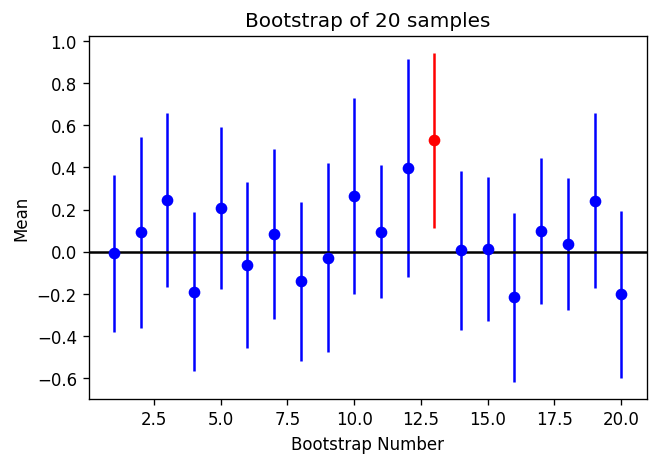

In [64]:
def ci_simulation():
    # Set the random seed to always get the same random numbers. 
    np.random.seed(4)

    # Create the figure.
    fig, ax = plt.subplots(dpi = 120)
    
    # Scatter Plot Formatting 
    fig.set_facecolor('white')
    ax.set_title('Bootstrap of 20 samples' )
    ax.set_xlabel('Bootstrap Number')
    ax.set_ylabel('Mean')

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color = 'k')
    
    f_count = 0
    p_count = 0

    # Do the following 20 times
    for i in range(20):

        #Draw 25 observations from a standard normal
        mu = 0
        sigma = 1
        sample_data = np.random.normal(mu, sigma, 25)
        
        # Compute what we need for the CI, namely the mean and the bounds
        mean, bounds = confidence_interval(sample_data)
        
        # color should be blue if it crosses the black line
        color = 'blue'
        if (min(bounds)>0)|(max(bounds)<0):
            # but in the case it does not, turn it red
            color = 'red'
            f_count += 1
        else:
            color = 'blue'
            p_count += 1

        # Need to get the length of the interval from bounds
        interval_len = 1.0/2*(bounds[1] - bounds[0])
        ax.errorbar(i+1, mean, yerr=interval_len, color = color, fmt = 'o')
        
    print(f"Red: {f_count} \nBlue: {p_count} \nPercent: {f_count/(p_count + f_count)}")

    # This function does not have to return anything
    return None

ci_simulation()

### Question 3: /8pts

If you haven't changed the random seed from 4 and if you implemented the solution correctly, you should one red interval.

Answer the following below in no more than 3 sentences:

**QUESTION 1:**  
a) How many red intervals did we expect to see?  What is your justifiation for this?

**ANSWER:**  
With a 95% confidence interval indicates that 95% of the estimators contain the true estimand. Conversely 5% of the estimators don't contain the true estimand. 
This translates to 5% of 20 simulated confidence intervals which equals 1 confidence interval that would be red. 

**QUESTION 2:**  
Changing the random seed might affect how many red intervals you see.  Try changing the  random seed in your function to 3.  This will yield two red intervals (which is different than what you should expect to see).  
b) Why does the simulation sometimes deviate from the predicted results?


**ANSWER:**   
With low numbers of simulation (this case 20) the predicted results will have a higher chance of deviating from the expected results.
Increasing the simulation number to a much larger number will decrease the amount of variance around the 5% marker. Testing comfirms this using the previous algorithm confirms this

### Question 4: /10pts

Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their rank, weight (wt - in pounds) and height (ht - in inches). 

Fit a linear model of weight (`wt`) explained by height (`ht`) using a linear regression model from sklearn, as done in the lab.  Call your fitted model `model`.  
Make a scatter plot of the height (x-axis) against weight (y-axis). 
Add the predicted values for 66-80 inches. 

Calculate the residuals from the fit, and report the r-squared for this model.

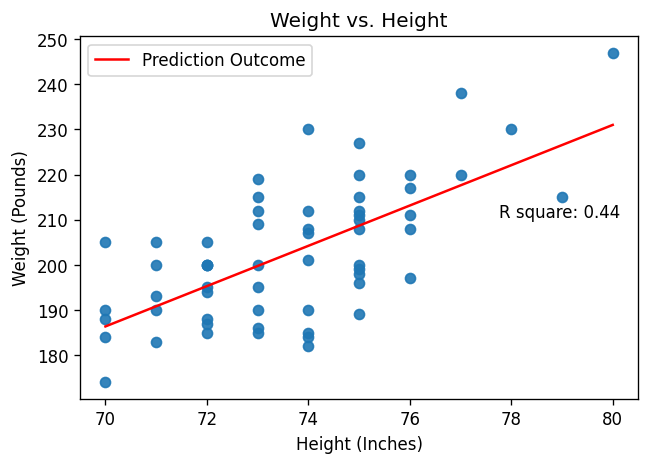

Training rsquared is  0.43807746842392215


In [65]:
df= pd.read_csv("hockey_draftees_2005.csv")

# Model Data
y = df.wt.values.reshape(-1,1)
x = df.ht.values.reshape(-1,1)

# Model
model = linear_model.LinearRegression()
model.fit(x, y)

# Line of Best Fit
x_line = np.linspace(min(x), max(x), 100).reshape(-1,1)
y_line = model.predict(x_line)

# Residual 
r2 = model.score(x, y)

y_pred = model.predict(x)
variance = (y)
residual = (y - y_pred)

# Scatter plot 
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Scatter Plot Formatting 
ax.set_title('Weight vs. Height')
ax.set_xlabel('Height (Inches)')
ax.set_ylabel('Weight (Pounds)')

# Plot Data
ax.scatter(x, y, alpha = 0.9)

# Plot Model
sns.lineplot(x=x_line[:,-1], y=y_line[:,-1], ci=None, sort=1, ax=ax, color = "red", label="Prediction Outcome")

ax.annotate(f'R square: {r2.round(2)}',
           xy = (0.75, 0.5),
           xycoords = 'axes fraction')
plt.show()


# Print R2
print('Training rsquared is ', r2)


### Question 5:  /15pts
### Bootstrap confidence intervals on parameters

How confident can we be about the relation between height and weight? 
To judge this we need confidence intervals let's use the bootstrap.

Modify the function `BootstrapCoef` from lab 04 - part 2 to conduct a boostrap analysis for this regression model; 

* `data`, which is a dataframe having columns 'weight' and 'height'
* `numboot` which is an integer denoting how many bootstrap replications to perform.

The function should return `theta`, a numpy array of regression coefficients of size (numboot, 2)

You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  `bootstrap` should return:
params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept value and the slope from the linear regression. 
Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_. 

Here is the documentation for `pd.DataFrame.sample`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

Then call the function to get 100 boostrap samples for your linear regression model of wt explained by height. 
Make a joint scatter plot of the parameter value for the intercept and for the slope. 

**QUESTION:**  
What do you notice? Why do you think the estimate for the intercept has such a high negative correlation with the slope? 

**ANSWER:**  
Note this question was already answered when the document was downloaded. I tried using the standard scaler lib to reduce colinear relationship but was having some problems. Hopefully we learn about this later! 

[Answer from Student] The intercept of the model when the mean is not subtracted means that the average weight of the player at a player height of 0 is between 100 and -200. 
Both of the bounds are completely meaningless. Centering the weight reduced colinearity and gives more meaningful intercept data. 

[Answer from Prof] Intercept and slope regressors are highly colinear - as we did not subtract the mean of ht before the regression.  

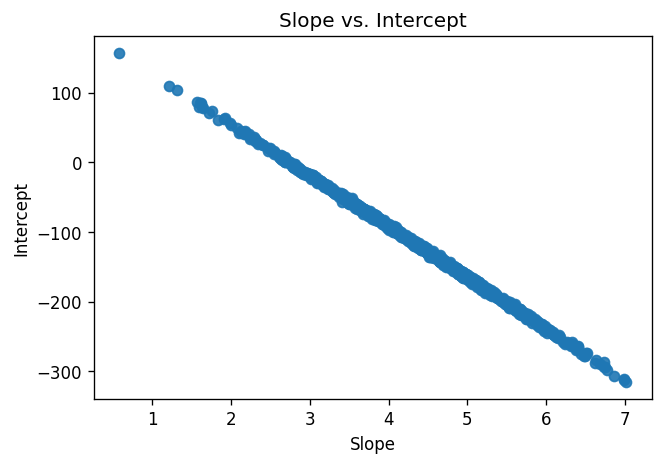

In [66]:
# Write a Bootstrap function that records the fitted models 

def BootstrapCoef(data, numboot=1000):
    
    # Repeatability 
    np.random.seed(4)
    theta = np.zeros((numboot, 2))
    
    # Create Model
    sample_model = linear_model.LinearRegression()
    # scaler = StandardScaler()
    
    # Bootstrap numboot times
    for i in range(numboot):
        
        # Sample Data
        sample_data = data.sample(n=25, replace=True)
        s_y = sample_data.wt.values.reshape(-1,1)
        s_x = sample_data.ht.values.reshape(-1,1)
        
        # Model
        # sample_model.fit(s_x, np.subtract(s_y, np.mean(s_y)))
        # scaled_data = scaler.fit_transform(s_x, s_y) 
        sample_model.fit(s_x, s_y)
        
        # Save coefs 
        theta[i,:] = [sample_model.coef_, sample_model.intercept_]
  
    return theta

theta = BootstrapCoef(df[['wt', 'ht']], numboot=1000)

# Plot
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Plot Formatting 
ax.set_title('Slope vs. Intercept')
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')

# Plot Data
ax.scatter(theta[:,0], theta[:,1], alpha = 0.9)

plt.show()


### Question 6: /12pts

Plot the bootstrap estimates for the slope as a histogram.  Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the slope.  

**QUESTION:**  
How can you interpret this confidence interval?  

**ANSWER:**  
[Answer from Student] The confidence interval has a 95% probability of containing the true estimand which in this case is the slope parameter.

[Answer from Prof] The interval contains the true slope parameter with a probability of 95%. 

Confidence interval is between 4.33933425682211  and  4.472133626393412


c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(4.405733941607761, [4.33933425682211, 4.472133626393412])

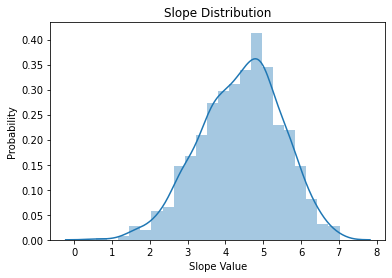

In [67]:
# Calculate bootstrap interval
theta = BootstrapCoef(df[['wt', 'ht']], numboot=1000)
slope = BootstrapCoef(df[['wt', 'ht']], numboot=1000)[:,0]
hist = sns.distplot(slope)

hist.set_title("Slope Distribution")
hist.set_xlabel("Slope Value")
hist.set_ylabel("Probability")
hist.set_facecolor('white')

boot_ci = confidence_interval(slope)[1]
print('Confidence interval is between', boot_ci[0], ' and ', boot_ci[1])

confidence_interval(slope)


### Question 7: /15pts
Modify the function `BootstrapPred` from lab04 to bootstrap your fit and generate a predict from each of these bootstrapped models.  

Draw again a scatter plot of height against weight and plot the predictions from the 20 fitted bootstrap models for the height ranging from 60 to 88. 

**QUESTION:**  
Where are we most uncertain in our prediction about the weight of a player? 
How does the negative correlation between slope and intercept play a role here?  
Why is the spread of the prediction in the mean weight so much lower than the variability of our intercept parameter? 

[Answer from Student] The uncertainty in the prediction increase on the lower and upper bound of the model.
This can be seen from the divergence of the model. The model is most confident when it converges on heights between 70 - 76.   
The slope and intercept have a negative correlation meaning that a larger slope will have a smaller intercept. Vice versa is also true.
The spread of the prediction in the the mean weight is lower due to the fact that there is much higher amount of data to make a more accurate prediction.

[Answer from Prof] The greatest uncertainty we have for the very small and very tall players. 
All lines agree in their prediction for the players of middle weight. 
For the lines to cross in the middle of the graph, a large slope needs to have a small intercept and a small slope needs to have a large intercept. 

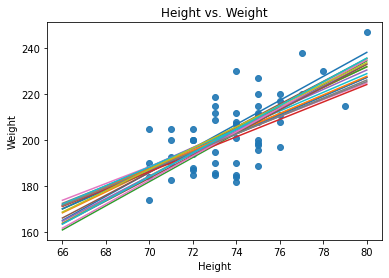

In [68]:
# Train a model on the training set 
def BootstrapPred(data, xp, numboot=1000):
    n = len(data)
    y_pred = np.zeros((numboot, xp.shape[0]))

    regression_model = sklearn.linear_model.LinearRegression()
    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        d_y = d.wt.values.reshape(-1,1)
        d_x = d.ht.values.reshape(-1,1)

        regression_model.fit(d_x, d_y)
        y_pred[i,:] = regression_model.predict(xp).reshape(-1)

    return y_pred 


x_pred = np.linspace(66, 80, 100).reshape(-1,1)
df_subset = df[(df.ht >= 60) & (df.ht <= 88)]
y_pred = BootstrapPred(df, x_pred)

# Formatting 

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight")

# Plot Models
for i in range(20):
    #sns.lineplot(x=x_pred, y=y_pred[i,:], ci=None, sort=1, ax=ax)
    plt.plot(x_pred, y_pred[i,:])

# Plot Data
plt.scatter(df_subset.ht, df_subset.wt, alpha = 0.9)

### Question 8:  /15pts

Now, let's see how well our model performs out of sample.  Load in the `hockey_draftees_test.csv` file into a dataframe.  
Use your fitted `model` to make predictions. 

Make a scatter plot of the test data and superimpose the prediction of the model. 
To evaluate this prediction, calculate the r-square value for the out of sample (oos) data.  Statsmodels doesn't provide a function to compute r-squared on new data.  You will have to write one yourself or find one that performs the computation for you.


Out of sample rsquared is  0.32847123946998247
0.3284712394699817


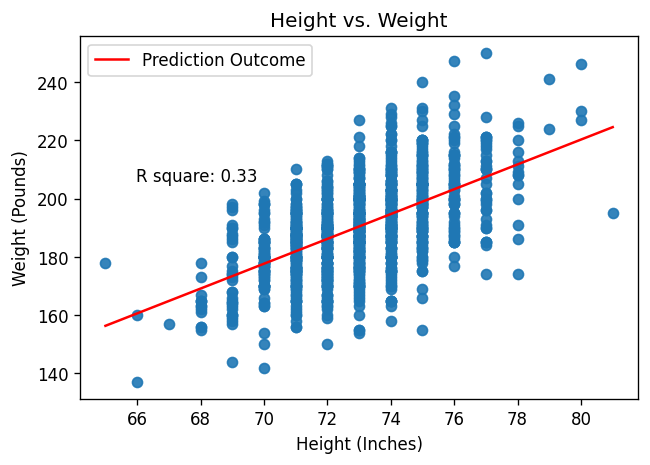

In [69]:
# Test Data
df_test = pd.read_csv('hockey_draftees_test.csv')
y_test = df_test.wt.values.reshape(-1,1)
x_test = df_test.ht.values.reshape(-1,1)

# Train Data
df_train = pd.read_csv("hockey_draftees_train.csv")
y_train = df_train.wt.values.reshape(-1,1)
x_train = df_train.ht.values.reshape(-1,1)

# Model

regression_model = sklearn.linear_model.LinearRegression()
regression_model.fit(x_train, y_train)

# Build Model
x_line = np.linspace(min(x_test), max(x_test), 200)
y_line = regression_model.predict(x_line)
y_pred = regression_model.predict(x_test)

# Make the scatter plot 
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Formatting 
ax.set_title('Height vs. Weight')
ax.set_xlabel('Height (Inches)')
ax.set_ylabel('Weight (Pounds)')

# Plot Data
ax.scatter(x_test, y_test, alpha = 0.9)
sns.lineplot(x=x_line[:,-1], y=y_line[:,-1], ci=None, sort=1, ax=ax, color = "red", label="Prediction Outcome")

#R2
rsquared_oos = 1 - sum(np.subtract(y_test, y_pred)**2) / sum(np.subtract(y_test, np.mean(y_test))**2) 
r2 = sklearn.metrics.r2_score(y_test, y_pred)
# regression_model.r2_score(x_test, y_test)

ax.annotate(f'R square: {r2.round(2)}',
           xy = (0.1, 0.6),
           xycoords = 'axes fraction')

print('Out of sample rsquared is ', rsquared_oos[0])
print(r2)
